In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **DATASET NO BALANCE**

# Import and split data


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.utils import plot_model
import pandas as pd
# Load preprocessed data
preprocessed_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intelligent System Project/no_balance.csv')
# Split into features and target
X = preprocessed_data.drop(columns='Letter')
X = X.drop(X.columns[:2], axis = 1).values
y = preprocessed_data['Letter'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=27)

# Hyperparameters


In [ ]:
input_units = 128
hidden_units = 64
output_units = len(pd.unique(y))

input_activation = 'relu'
hidden_activation = 'relu'
output_activation = 'softmax'

learning_rate = 1e-3
epochs = 60
batch_size = 32


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 128)               8064      
                                                                 
 dense_55 (Dense)            (None, 64)                8256      
                                                                 
 dense_56 (Dense)            (None, 28)                1820      
                                                                 
Total params: 18,140
Trainable params: 18,140
Non-trainable params: 0
_________________________________________________________________


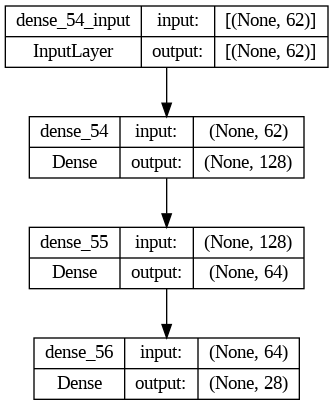

In [ ]:

# Create the model
model = Sequential()
model.add(Dense(input_units, input_dim = X_train.shape[1], activation = input_activation))
model.add(Dense(hidden_units, activation = hidden_activation))
model.add(Dense(output_units, activation = output_activation))

# (64 * 128 + 64 * 129 + 28 * 65)
model.summary() 
plot_model(model, show_shapes=True)

In [ ]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Using sparse_categorical_crossentrpy to match the labels format (they are not one-hot encoded)
#model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=epochs)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/60
1628/1628 [==============================] - 3s 2ms/step - loss: 0.4400 - accuracy: 0.8922 - val_loss: 0.1347 - val_accuracy: 0.9660
Epoch 2/60
1628/1628 [==============================] - 3s 2ms/step - loss: 0.1155 - accuracy: 0.9699 - val_loss: 0.0914 - val_accuracy: 0.9754
Epoch 3/60
1628/1628 [==============================] - 3s 2ms/step - loss: 0.0889 - accuracy: 0.9759 - val_loss: 0.0882 - val_accuracy: 0.9760
Epoch 4/60
1628/1628 [==============================] - 3s 2ms/step - loss: 0.0730 - accuracy: 0.9798 - val_loss: 0.0708 - val_accuracy: 0.9816
Epoch 5/60
1628/1628 [==============================] - 3s 2ms/step - loss: 0.0664 - accuracy: 0.9820 - val_loss: 0.0580 - val_accuracy: 0.9844
Epoch 6/60
1628/1628 [==============================] - 3s 2ms/step - loss: 0.0562 - accuracy: 0.9845 - val_loss: 0.0577 - val_accuracy: 0.9839
Epoch 7/60
1628/1628 [==============================] - 3s 2ms/step - loss: 0.0520 - accuracy: 0.9858 - val_loss: 0.0493 - val_accuracy:

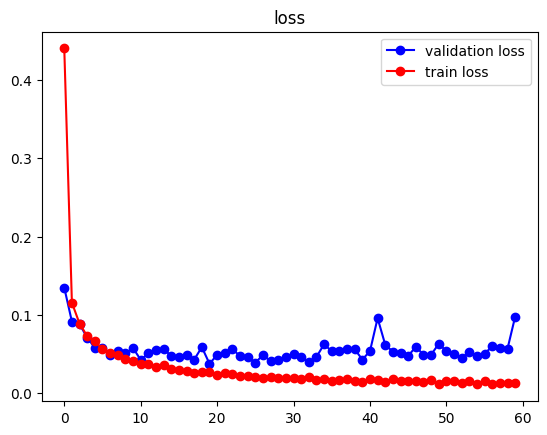

In [ ]:
def plot_loss(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  plt.figure()
  plt.plot(val_loss,'o-b', label='validation loss')
  plt.title('val_loss')
  plt.plot(loss,'o-r', label='train loss')
  plt.title('loss')
  plt.legend()
  plt.show()

plot_loss(history)

# **DATASET UNDERSAMPLE**

# Import and split data


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.utils import plot_model
import pandas as pd
# Load preprocessed data
preprocessed_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intelligent System Project/undersampled.csv')
# Split into features and target
X = preprocessed_data.drop(columns='Letter')
X = X.drop(X.columns[:2], axis = 1).values
y = preprocessed_data['Letter'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=27)

# Hyperparameters


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 128)               8064      
                                                                 
 dense_55 (Dense)            (None, 64)                8256      
                                                                 
 dense_56 (Dense)            (None, 28)                1820      
                                                                 
Total params: 18,140
Trainable params: 18,140
Non-trainable params: 0
_________________________________________________________________


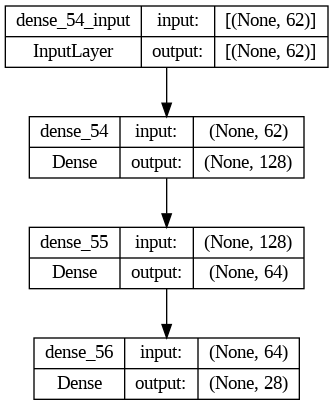

In [ ]:

# Create the model
model = Sequential()
model.add(Dense(input_units, input_dim = X_train.shape[1], activation = input_activation))
model.add(Dense(hidden_units, activation = hidden_activation))
model.add(Dense(output_units, activation = output_activation))

# (64 * 128 + 64 * 129 + 28 * 65)
model.summary() 
plot_model(model, show_shapes=True)

In [ ]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Using sparse_categorical_crossentrpy to match the labels format (they are not one-hot encoded)
#model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=epochs)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/60
1628/1628 [==============================] - 3s 2ms/step - loss: 0.4400 - accuracy: 0.8922 - val_loss: 0.1347 - val_accuracy: 0.9660
Epoch 2/60
1628/1628 [==============================] - 3s 2ms/step - loss: 0.1155 - accuracy: 0.9699 - val_loss: 0.0914 - val_accuracy: 0.9754
Epoch 3/60
1628/1628 [==============================] - 3s 2ms/step - loss: 0.0889 - accuracy: 0.9759 - val_loss: 0.0882 - val_accuracy: 0.9760
Epoch 4/60
1628/1628 [==============================] - 3s 2ms/step - loss: 0.0730 - accuracy: 0.9798 - val_loss: 0.0708 - val_accuracy: 0.9816
Epoch 5/60
1628/1628 [==============================] - 3s 2ms/step - loss: 0.0664 - accuracy: 0.9820 - val_loss: 0.0580 - val_accuracy: 0.9844
Epoch 6/60
1628/1628 [==============================] - 3s 2ms/step - loss: 0.0562 - accuracy: 0.9845 - val_loss: 0.0577 - val_accuracy: 0.9839
Epoch 7/60
1628/1628 [==============================] - 3s 2ms/step - loss: 0.0520 - accuracy: 0.9858 - val_loss: 0.0493 - val_accuracy:

In [ ]:
plot_loss(history)

# **DATASET SMOTE**

# Import and split data


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.utils import plot_model
import pandas as pd
# Load preprocessed data
preprocessed_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intelligent System Project/smote.csv')
# Split into features and target
X = preprocessed_data.drop(columns='Letter')
X = X.drop(X.columns[:2], axis = 1).values
y = preprocessed_data['Letter'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=27)

# Hyperparameters


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 128)               8064      
                                                                 
 dense_55 (Dense)            (None, 64)                8256      
                                                                 
 dense_56 (Dense)            (None, 28)                1820      
                                                                 
Total params: 18,140
Trainable params: 18,140
Non-trainable params: 0
_________________________________________________________________


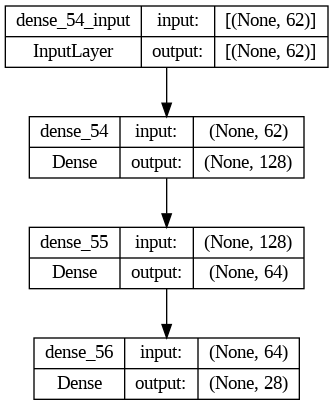

In [ ]:

# Create the model
model = Sequential()
model.add(Dense(input_units, input_dim = X_train.shape[1], activation = input_activation))
model.add(Dense(hidden_units, activation = hidden_activation))
model.add(Dense(output_units, activation = output_activation))

# (64 * 128 + 64 * 129 + 28 * 65)
model.summary() 
plot_model(model, show_shapes=True)

In [ ]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Using sparse_categorical_crossentrpy to match the labels format (they are not one-hot encoded)
#model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=epochs)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/60
1628/1628 [==============================] - 3s 2ms/step - loss: 0.4400 - accuracy: 0.8922 - val_loss: 0.1347 - val_accuracy: 0.9660
Epoch 2/60
1628/1628 [==============================] - 3s 2ms/step - loss: 0.1155 - accuracy: 0.9699 - val_loss: 0.0914 - val_accuracy: 0.9754
Epoch 3/60
1628/1628 [==============================] - 3s 2ms/step - loss: 0.0889 - accuracy: 0.9759 - val_loss: 0.0882 - val_accuracy: 0.9760
Epoch 4/60
1628/1628 [==============================] - 3s 2ms/step - loss: 0.0730 - accuracy: 0.9798 - val_loss: 0.0708 - val_accuracy: 0.9816
Epoch 5/60
1628/1628 [==============================] - 3s 2ms/step - loss: 0.0664 - accuracy: 0.9820 - val_loss: 0.0580 - val_accuracy: 0.9844
Epoch 6/60
1628/1628 [==============================] - 3s 2ms/step - loss: 0.0562 - accuracy: 0.9845 - val_loss: 0.0577 - val_accuracy: 0.9839
Epoch 7/60
1628/1628 [==============================] - 3s 2ms/step - loss: 0.0520 - accuracy: 0.9858 - val_loss: 0.0493 - val_accuracy:

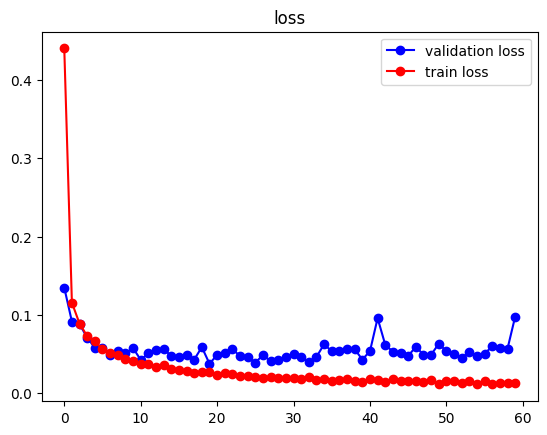

In [ ]:
plot_loss(history)

# Confusion matrix


407/407 [==============================] - 0s 1ms/step


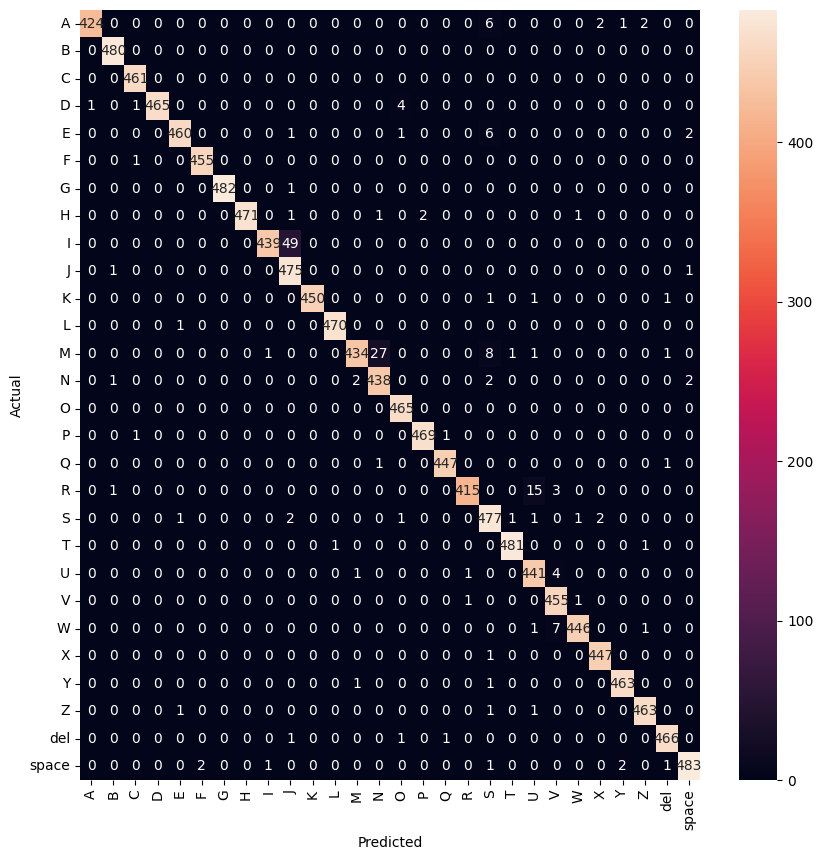

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

category_id_df = []
for a in range(26):
  category_id_df.append(chr(65 + a))
category_id_df += ["del", "space"]

confidence = model.predict(X_val)

predicted = []
for elem in confidence:
  predicted.append(np.argmax(elem))

#x_train, x_test, y_train, y_test
def plot_cm(y_test, predicted):
    conf_mat = confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id_df, yticklabels=category_id_df)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_cm(y_val, predicted)

In [ ]:
# SAVE MODEL 
model.save('/content/drive/MyDrive/Colab Notebooks/Intelligent System Project/models/smote_mediapipe')